In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.simplefilter(action='ignore')
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata as ad
sc.set_figure_params(frameon=False)

In [152]:
adata

AnnData object with n_obs × n_vars = 837586 × 2505
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'ID', 'Condition', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'Level_1', 'Level_1_refined', 'level0_leiden_sub_subcluster', 'Leiden_whole_object', 'doublet_scores', 'predicted_doublets'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable_nbatches-0', 'highly_variable_intersection-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct

In [2]:
sc.__version__

'1.10.4'

In [3]:
adata = ad.read_zarr('../Finalized/scpoli_final_refined.zarr')

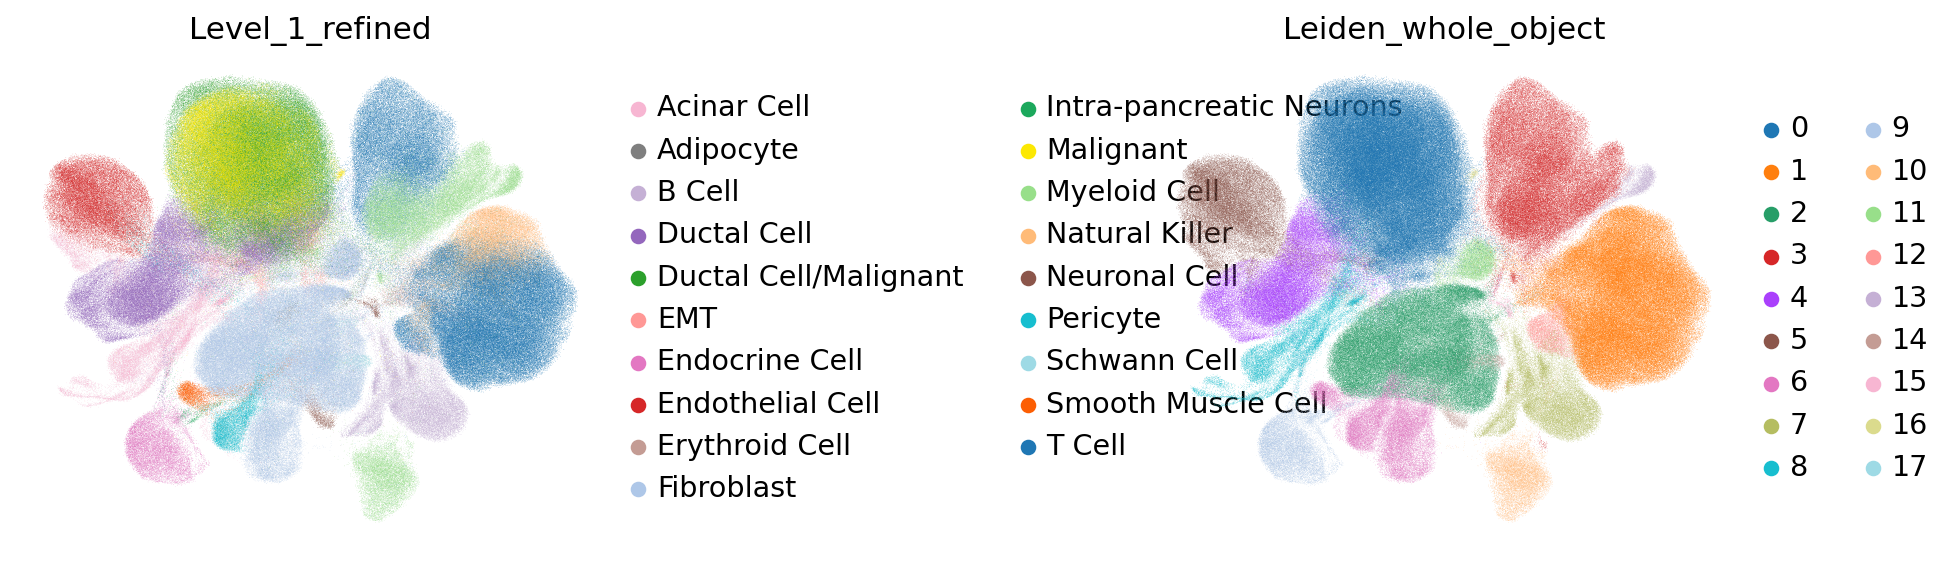

In [4]:
sc.pl.umap(adata, color=['Level_1_refined', 'Leiden_whole_object',], wspace=0.75)

In [7]:
adata

AnnData object with n_obs × n_vars = 837586 × 2505
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'ID', 'Condition', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'Level_1', 'Level_1_refined', 'level0_leiden_sub_subcluster', 'Leiden_whole_object'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable_nbatches-0', 'highly_variable_intersection-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0',

# QC

In [9]:
adata.obs.head()

Barcode  \
Dataset_Barcode                                                                         
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0  AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0  AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0   

                                              Dataset      ID_batch_covariate  \
Dataset_Barcode                                                                 
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   

                                                    ID  Condition  n_genes  \
Dataset_Barcode                                                              
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq   3440.0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq   1976.0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq   2675.0   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq   1693.0   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq   2042.0   

                                               n_counts  log_counts   mt_frac  \
Dataset_Barcode                                                                 
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   10981.0    9.303922  0.068573   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0    5352.0    8.585226  0.113416   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0    8489.0    9.046527  0.112852   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0    4195.0    8.341649  0.082956   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0    5616.0    8.633375  0.089387   

                                               n_genes_by_counts  ...  \
Dataset_Barcode                                                   ...   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0               3440  ...   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0               1976  ...   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0               2675  ...   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0               1693  ...   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0               2042  ...   

                                               outlier  \
Dataset_Barcode                                          
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0        0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0        0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0        0   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0        0   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0        0   

                                               infercnv_score_malignant  \
Dataset_Barcode                                                           
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0             Non-Malignant   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0             Non-Malignant   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0             Non-Malignant   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0             Non-Malignant   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0             Non-Malignant   

                                               infercnv_score_malignant_refined  \
Dataset_Barcode                                                                   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0                     Non-Malignant   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0                     Non-Maligna

In [14]:
early_qc = adata.obs[['n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito']]

In [16]:
early_qc.head()

n_genes  n_counts  log_counts  \
Dataset_Barcode                                                                
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   3440.0   10981.0    9.303922   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0   1976.0    5352.0    8.585226   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0   2675.0    8489.0    9.046527   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0   1693.0    4195.0    8.341649   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0   2042.0    5616.0    8.633375   

                                                mt_frac  n_genes_by_counts  \
Dataset_Barcode                                                              
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0  0.068573               3440   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0  0.113416               1976   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0  0.112852               2675   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0  0.082956               1693   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0  0.089387               2042   

                                               log1p_n_genes_by_counts  \
Dataset_Barcode                                                          
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0                 8.143517   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0                 7.589336   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0                 7.892078   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0                 7.434848   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0                 7.622175   

                                               total_counts  \
Dataset_Barcode                                               
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0       10981.0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0        5352.0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0        8489.0   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0        4195.0   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0        5616.0   

                                               log1p_total_counts  \
Dataset_Barcode                                                     
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0            9.304013   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0            8.585412   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0            9.046644   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0            8.341887   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0            8.633553   

                                               total_counts_mito  \
Dataset_Barcode                                                    
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0              753.0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0              607.0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0              958.0   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0              348.0   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0              502.0   

                                               log1p_total_counts_mito  \
Dataset_Barcode                                                          
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0                 6.625392   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0                 6.410175   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0                 6.865891   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0                 5.855072   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0                 6.220590   

                                               pct_counts_mito  
Dataset_Barcode                                                 
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0         6.857299  
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0        11.341555  
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0        11.285193  
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0         8.295590  
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0         8.938746

In [25]:
cols_to_drop =['n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito']

In [34]:
for i in cols_to_drop:
    adata.obs[i] = early_qc[i].copy()

In [35]:
adata.obs.head()

Barcode  \
Dataset_Barcode                                                                         
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0  AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0  AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0   

                                              Dataset      ID_batch_covariate  \
Dataset_Barcode                                                                 
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   

                                                    ID  Condition leiden  \
Dataset_Barcode                                                            
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq      8   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq     30   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq     13   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq     30   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq     13   

                                              batch leiden_0.2  \
Dataset_Barcode                                                  
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0     0          3   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0     0          0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0     0          0   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0     0          0   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0     0          0   

                                              leiden_0.2_annotation  \
Dataset_Barcode                                                       
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0                Immune   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0               Stromal   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0               Stromal   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0               Stromal   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0               Stromal   

                                              leiden_subcluster  ... n_counts  \
Dataset_Barcode                                                  ...            
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0           Unknown  ...  10981.0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0           Unknown  ...   5352.0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0           Unknown  ...   8489.0   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0           Unknown  ...   4195.0   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0           Unknown  ...   5616.0   

                                              log_counts   mt_frac  \
Dataset_Barcode                                                      
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   9.303922  0.068573   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0   8.585226  0.113416   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0   9.046527  0.112852   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0   8.341649  0.082956   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0   8.633375  0.089387   

                                               n_genes_by_counts  \
Dataset_Barcode                                                    
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0               3440   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0               1976   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0               2

In [ ]:
# QC again manually

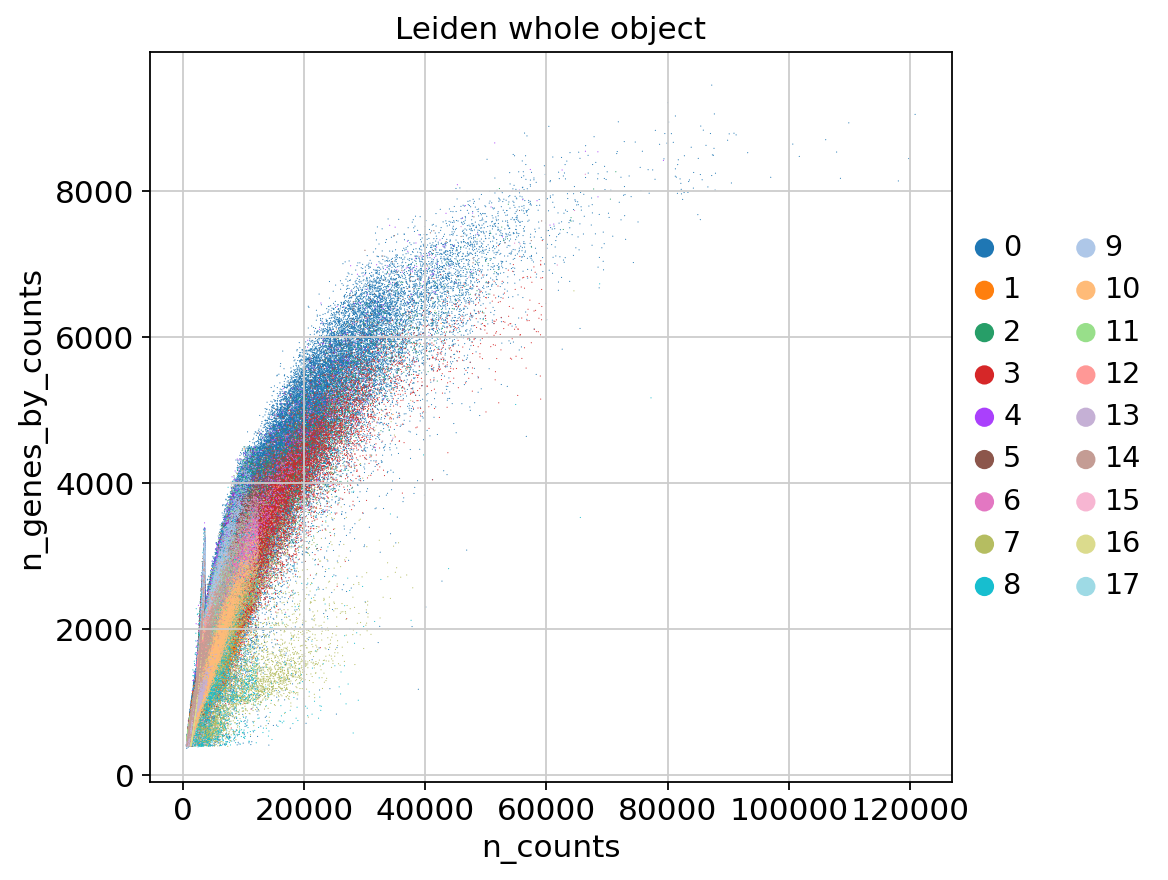

In [64]:
plt.rcParams['figure.figsize'] = (6,6)
sc.pl.scatter(adata, "log_counts", "log1p_n_genes_by_counts", color="Leiden_whole_object", size=1, )
sc.pl.scatter(adata, "n_counts", "n_genes_by_counts", color="Leiden_whole_object", size=1, )

# Fix Level 0

In [71]:
adata.obs.groupby(['Level_0', 'Level_1_refined']).size().unstack().T

Level_0                   Endocrine Cell  Endothelial Cell  \
Level_1_refined                                              
Acinar Cell                            0                 0   
Adipocyte                              0                 0   
B Cell                                 0                 0   
Ductal Cell                            0                 0   
Ductal Cell/Malignant                  0                 0   
EMT                                    0                 0   
Endocrine Cell                      1760                 0   
Endothelial Cell                       0              4628   
Erythroid Cell                         0                 0   
Fibroblast                             0                 0   
Intra-pancreatic Neurons               0                 0   
Malignant                              0                 0   
Myeloid Cell                           0                 0   
Natural Killer                         0                 0   
Neuronal Cell                          0                 0   
Pericyte                               0                 0   
Schwann Cell                           0                 0   
Smooth Muscle Cell                     0                 0   
T Cell                                 0                 0   

Level_0                   Epithelial/Malignant Cell  Erythroid Cell  \
Level_1_refined                                                       
Acinar Cell                                   18121               0   
Adipocyte                                         0               0   
B Cell                                          872               0   
Ductal Cell                                   38676               0   
Ductal Cell/Malignant                        139622               0   
EMT                                           10853               0   
Endocrine Cell                                    0               0   
Endothelial Cell                                  0               0   
Erythroid Cell                                    0             377   
Fibroblast                                        0               0   
Intra-pancreatic Neurons                          0               0   
Malignant                                         0               0   
Myeloid Cell                                   1206               0   
Natural Killer                                    0               0   
Neuronal Cell                                     0               0   
Pericyte                                          0               0   
Schwann Cell                                      0               0   
Smooth Muscle Cell                                0               0   
T Cell                                            0               0   

Level_0                   Immune Cell  Neuronal Cell  Stromal Cell  
Level_1_refined                                                     
Acinar Cell                        10              0          1257  
Adipocyte                           1              0           694  
B Cell                          27209              0             2  
Ductal Cell                       346              0            51  
Ductal Cell/Malignant            1611              9           286  
EMT                                34              0            15  
Endocrine Cell                      0              0             0  
Endothelial Cell                    9              0         17284  
Erythroid Cell                   3415              0             0  
Fibroblast                        364              1         81568  
Intra-pancreatic Neurons            0              0             0  
Malignant                           0              0             0  
Myeloid Cell                    32538              0           154  
Natural Killer                  29527              0             0  
Neuronal Cell                       0           2819             0  
Pericyte                        

In [72]:
df = adata.obs[['Level_0', 'Level_1_refined']]
dominant_mapping = (
    df.groupby(['Level_1_refined', 'Level_0'])
    .size()
    .unstack(fill_value=0)
    .idxmax(axis=1)
)

df['Corrected_Level_0'] = df['Level_1_refined'].map(dominant_mapping)
misclassified = df[df['Level_0'] != df['Corrected_Level_0']]


In [73]:
adata.obs.loc[misclassified.index, 'Level_0'] = misclassified['Corrected_Level_0']

In [74]:
adata.obs.groupby(['Level_0', 'Level_1_refined']).size().unstack().T

Level_0                   Endocrine Cell  Endothelial Cell  \
Level_1_refined                                              
Acinar Cell                            0                 0   
Adipocyte                              0                 0   
B Cell                                 0                 0   
Ductal Cell                            0                 0   
Ductal Cell/Malignant                  0                 0   
EMT                                    0                 0   
Endocrine Cell                     15931                 0   
Endothelial Cell                       0                 0   
Erythroid Cell                         0                 0   
Fibroblast                             0                 0   
Intra-pancreatic Neurons             944                 0   
Malignant                          70071                 0   
Myeloid Cell                           0                 0   
Natural Killer                         0                 0   
Neuronal Cell                          0                 0   
Pericyte                           11678                 0   
Schwann Cell                        2348                 0   
Smooth Muscle Cell                  4322                 0   
T Cell                                 0                 0   

Level_0                   Epithelial/Malignant Cell  Erythroid Cell  \
Level_1_refined                                                       
Acinar Cell                                   30393               0   
Adipocyte                                         0               0   
B Cell                                            0               0   
Ductal Cell                                   73498               0   
Ductal Cell/Malignant                        141528               0   
EMT                                           10902               0   
Endocrine Cell                                    0               0   
Endothelial Cell                                  0               0   
Erythroid Cell                                    0               0   
Fibroblast                                        0               0   
Intra-pancreatic Neurons                          0               0   
Malignant                                         0               0   
Myeloid Cell                                      0               0   
Natural Killer                                    0               0   
Neuronal Cell                                     0               0   
Pericyte                                          0               0   
Schwann Cell                                      0               0   
Smooth Muscle Cell                                0               0   
T Cell                                            0               0   

Level_0                   Immune Cell  Neuronal Cell  Stromal Cell  
Level_1_refined                                                     
Acinar Cell                         0              0             0  
Adipocyte                           0              0          1659  
B Cell                          32309              0             0  
Ductal Cell                         0              0             0  
Ductal Cell/Malignant               0              0             0  
EMT                                 0              0             0  
Endocrine Cell                      0              0             0  
Endothelial Cell                    0              0         38198  
Erythroid Cell                   3792              0             0  
Fibroblast                          0              0        135238  
Intra-pancreatic Neurons            0              0             0  
Malignant                           0              0             0  
Myeloid Cell                    53499              0             0  
Natural Killer                  31277              0             0  
Neuronal Cell                       0           2819             0  
Pericyte                        

# Detect Doublets

In [28]:
import scrublet as scr

In [47]:
pwd

'/ictstr01/home/aih/shrey.parikh/PDAC/PDAC_Final/Notebooks'

In [46]:
doublet_results = []
for dataset in adata.obs.Dataset.unique().tolist():
    adata_temp = adata[adata.obs.Dataset == dataset]
    print(f'Running scrublet for {dataset} with shape {adata_temp.shape}')
    adata_temp.X = adata_temp.layers['raw']
    scrub = scr.Scrublet(adata_temp.X, expected_doublet_rate=0.06)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(verbose=False)
    df_temp = pd.DataFrame({
    'obs_names': adata_temp.obs_names,
    'Dataset': dataset,
    'doublet_scores': doublet_scores,
    'predicted_doublets': predicted_doublets
    })
    doublet_results.append(df_temp)
    
doublet_df = pd.concat(doublet_results, ignore_index=True)


Running scrublet for Ding with shape (145616, 2505)
Running scrublet for Lee with shape (8507, 2505)
Running scrublet for Simeone with shape (202124, 2505)
Running scrublet for Steele with shape (35768, 2505)
Running scrublet for Peng with shape (41536, 2505)
Running scrublet for Caronni with shape (70650, 2505)
Running scrublet for Zhang with shape (35579, 2505)
Running scrublet for Lin with shape (16097, 2505)
Running scrublet for Schlesinger with shape (5873, 2505)
Running scrublet for Steele_Adj_Norm with shape (9896, 2505)
Running scrublet for Peng_Normal with shape (15340, 2505)
Running scrublet for Regev with shape (191950, 2505)
Running scrublet for Ding_snRNA-seq with shape (58650, 2505)


In [50]:
doublet_df.set_index('obs_names', inplace=True)

In [60]:
doublet_df.predicted_doublets = doublet_df.predicted_doublets.astype(str)

In [67]:
# df2.reindex(df.index
doublet_df.reindex(adata.obs_names)
adata.obs['doublet_scores'] = doublet_df['doublet_scores'].copy()
adata.obs['predicted_doublets'] = doublet_df['predicted_doublets'].tolist()

In [68]:
adata.obs.head()

Barcode  \
Dataset_Barcode                                                                         
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0  AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0  AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0   

                                              Dataset      ID_batch_covariate  \
Dataset_Barcode                                                                 
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   

                                                    ID  Condition  n_genes  \
Dataset_Barcode                                                              
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq   3440.0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq   1976.0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq   2675.0   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq   1693.0   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0  HT056P1  scRNA-seq   2042.0   

                                               n_counts  log_counts   mt_frac  \
Dataset_Barcode                                                                 
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   10981.0    9.303922  0.068573   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0    5352.0    8.585226  0.113416   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0    8489.0    9.046527  0.112852   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0    4195.0    8.341649  0.082956   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0    5616.0    8.633375  0.089387   

                                               n_genes_by_counts  ...  \
Dataset_Barcode                                                   ...   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0               3440  ...   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0               1976  ...   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0               2675  ...   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0               1693  ...   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0               2042  ...   

                                               infercnv_score_malignant_refined  \
Dataset_Barcode                                                                   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0                     Non-Malignant   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0                     Non-Malignant   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0                     Non-Malignant   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0                     Non-Malignant   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0                     Non-Malignant   

                                               cnv_score_abs  \
Dataset_Barcode                                                
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0       0.012955   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0       0.006726   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0       0.006726   
Ding_AAACGAACACGTAGAG-1-HT056P-S1PAA1-0-0-0-0       0.009569   
Ding_AAACGAACAGTTAGAA-1-HT056P-S1PAA1-0-0-0-0       0.012462   

                                               treatment_status       Level_0  \
Dataset_Barcode                                                                 
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0               NaN  S

In [79]:
sc.pl.umap(adata, color=['Level_1_refined'], ncols=1)
sc.pl.umap(adata, color=['predicted_doublets'], groups='True', size=5, ncols=1)

In [81]:
adata.obs.groupby(['Dataset', 'predicted_doublets']).size().unstack()

predicted_doublets   False  True
Dataset                         
Caronni              70649     1
Ding                145614     2
Ding_snRNA-seq       58649     1
Lee                   8499     8
Lin                  16095     2
Peng                 41531     5
Peng_Normal          14679   661
Regev               191912    38
Schlesinger           5871     2
Simeone             202124     0
Steele               35741    27
Steele_Adj_Norm       9895     1
Zhang                35564    15

In [82]:
adata.obs.groupby(['Level_1_refined', 'predicted_doublets']).size().unstack()

predicted_doublets         False  True
Level_1_refined                       
Acinar Cell                29921   472
Adipocyte                   1658     1
B Cell                     32308     1
Ductal Cell                73404    94
Ductal Cell/Malignant     141514    14
EMT                        10881    21
Endocrine Cell             15931     0
Endothelial Cell           38168    30
Erythroid Cell              3791     1
Fibroblast                135177    61
Intra-pancreatic Neurons     944     0
Malignant                  70062     9
Myeloid Cell               53473    26
Natural Killer             31273     4
Neuronal Cell               2818     1
Pericyte                   11674     4
Schwann Cell                2347     1
Smooth Muscle Cell          4322     0
T Cell                    177157    23

In [80]:
adata.write_zarr('../Finalized/malpoli_final_refined.zarr')

# Leiden for T Cells

In [83]:
t_cells = adata[adata.obs.Level_1 == 'T Cell'].copy()

In [85]:
t_cells

AnnData object with n_obs × n_vars = 174287 × 2505
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'ID', 'Condition', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'Level_1', 'Level_1_refined', 'level0_leiden_sub_subcluster', 'Leiden_whole_object', 'doublet_scores', 'predicted_doublets'
    var: 'n_cells', 'ensembl_id', 'start', 'end', 'chromosome', 'gene_name-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable_nbatches-0', 'highly_variable_intersection-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct

In [ ]:
sc.pp.neighbors(t_cells, use_rep='X_scpoli')
sc.tl.leiden(t_cells, resolution=0.5)

IOStream.flush timed out
IOStream.flush timed out


In [ ]:
t_cells.obsm['X_umap_global'] = t_cells.obsm['X_umap'].copy()

In [88]:
sc.tl.umap(t_cells)

In [89]:
sc.pl.umap(t_cells, color=['Level_1_refined', 'leiden'])

# Leiden for Epithelial Cells

In [96]:
mal = adata[adata.obs.Level_1_refined.isin(['Malignant', 'Ductal Cell/Malignant'])].copy()

In [98]:
mal.obs.groupby(['Dataset']).size()

Dataset
Caronni            17171
Ding                9957
Ding_snRNA-seq     16225
Lee                 2467
Lin                 8099
Peng               10804
Peng_Normal            2
Regev              53846
Schlesinger         2464
Simeone            61232
Steele              8795
Steele_Adj_Norm      283
Zhang              20254
dtype: int64

In [99]:
sc.pp.neighbors(mal, use_rep='X_scpoli', n_neighbors=)
sc.tl.leiden(mal, resolution=0.5)

In [100]:
mal.obsm['X_umap_global'] = mal.obsm['X_umap'].copy()

In [101]:
sc.tl.umap(mal)

In [102]:
sc.pl.umap(mal, color=['Level_1_refined', 'leiden'])

In [108]:
sc.pp.neighbors(mal, use_rep='X_scpoli', n_neighbors=100)
sc.tl.leiden(mal, resolution=0.5)

In [109]:
mal.obsm['X_umap_global'] = mal.obsm['X_umap'].copy()

In [118]:
sc.pl.umap(mal, color=['Level_1_refined', 'leiden', 'predicted_doublets'], size=5)

In [121]:
#try to see if these clusters are outliers
from scipy.stats import median_abs_deviation
def is_outlier(data, nmads=5):
    median = np.median(data)
    mad = median_abs_deviation(data)
    return (data < median - nmads * mad) | (data > median + nmads * mad)

In [131]:
mal.obs['outlier_subset'] = False
for dataset in mal.obs['Dataset'].unique():
    for cell in mal.obs.loc[mal.obs['Dataset'] == dataset, 'Level_1_refined'].unique():
        print(f'Processing {cell} in {dataset}')
        cell_mask = (mal.obs['Dataset'] == dataset) & (mal.obs['Level_1_refined'] == cell)
        total_outliers = pd.Series(False, index=mal.obs.index) 
        outlier_total_counts = is_outlier(mal.obs.loc[cell_mask, 'log1p_total_counts'], 3)
        outlier_n_genes = is_outlier(mal.obs.loc[cell_mask, 'log1p_n_genes_by_counts'], 3)
        outlier_mito = is_outlier(mal.obs.loc[cell_mask, 'pct_counts_mito'], 3)
        combined_outlier = outlier_total_counts | outlier_n_genes | outlier_mito 
        mal.obs.loc[cell_mask, 'outlier_subset'] |= combined_outlier

Processing Ductal Cell/Malignant in Ding
Processing Ductal Cell/Malignant in Lee
Processing Ductal Cell/Malignant in Simeone
Processing Ductal Cell/Malignant in Steele
Processing Ductal Cell/Malignant in Peng
Processing Ductal Cell/Malignant in Caronni
Processing Ductal Cell/Malignant in Zhang
Processing Ductal Cell/Malignant in Lin
Processing Ductal Cell/Malignant in Schlesinger
Processing Ductal Cell/Malignant in Steele_Adj_Norm
Processing Ductal Cell/Malignant in Peng_Normal
Processing Malignant in Regev
Processing Malignant in Ding_snRNA-seq


In [132]:
mal.obs.outlier_subset = mal.obs.outlier_subset.astype(str)

In [139]:
mal.obs.groupby(['Dataset', 'outlier_subset']).size().unstack()['True']

Dataset
Caronni            1831
Ding                  0
Ding_snRNA-seq       20
Lee                   0
Lin                2332
Peng                453
Peng_Normal           0
Regev              2240
Schlesinger         651
Simeone            1156
Steele             1133
Steele_Adj_Norm      41
Zhang               917
Name: True, dtype: int64

In [141]:
print(mal.obs.groupby(['Dataset', 'outlier_subset']).size().unstack()['True'].sum())
print(mal.obs.groupby(['Dataset', 'outlier_subset']).size().unstack()['False'].sum())

10774
200825


In [142]:
mal.shape

(211599, 2505)

In [143]:
mal_subset = mal[mal.obs.outlier_subset == 'False']

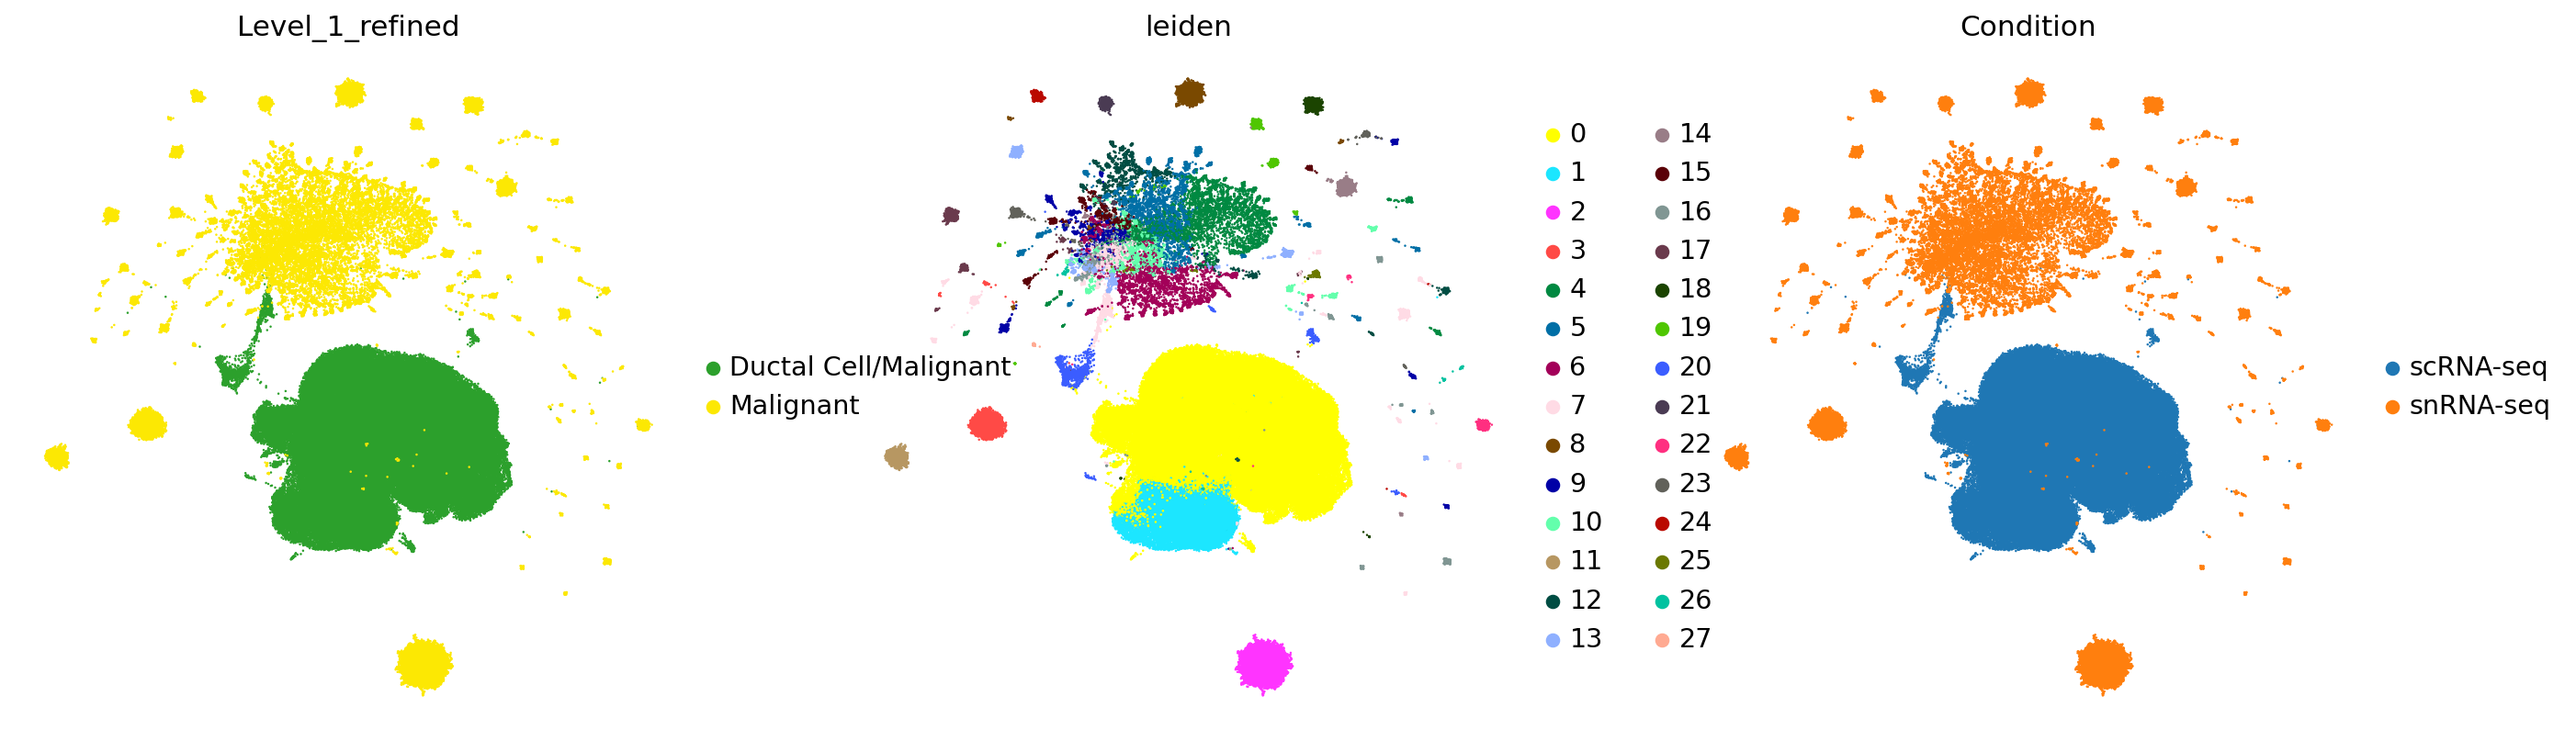

In [151]:
sc.pl.umap(mal, color=['Level_1_refined', 'leiden', 'Condition'], size=5, ncols=3)
sc.pl.umap(mal, color=['predicted_doublets', 'outlier_subset'], groups='True', size=5, ncols=2)

In [145]:
sc.pp.neighbors(mal_subset, use_rep='X_scpoli', n_neighbors=100)
sc.tl.leiden(mal_subset, resolution=0.5)

In [147]:
pwd

'/ictstr01/home/aih/shrey.parikh/PDAC/PDAC_Final/Notebooks'

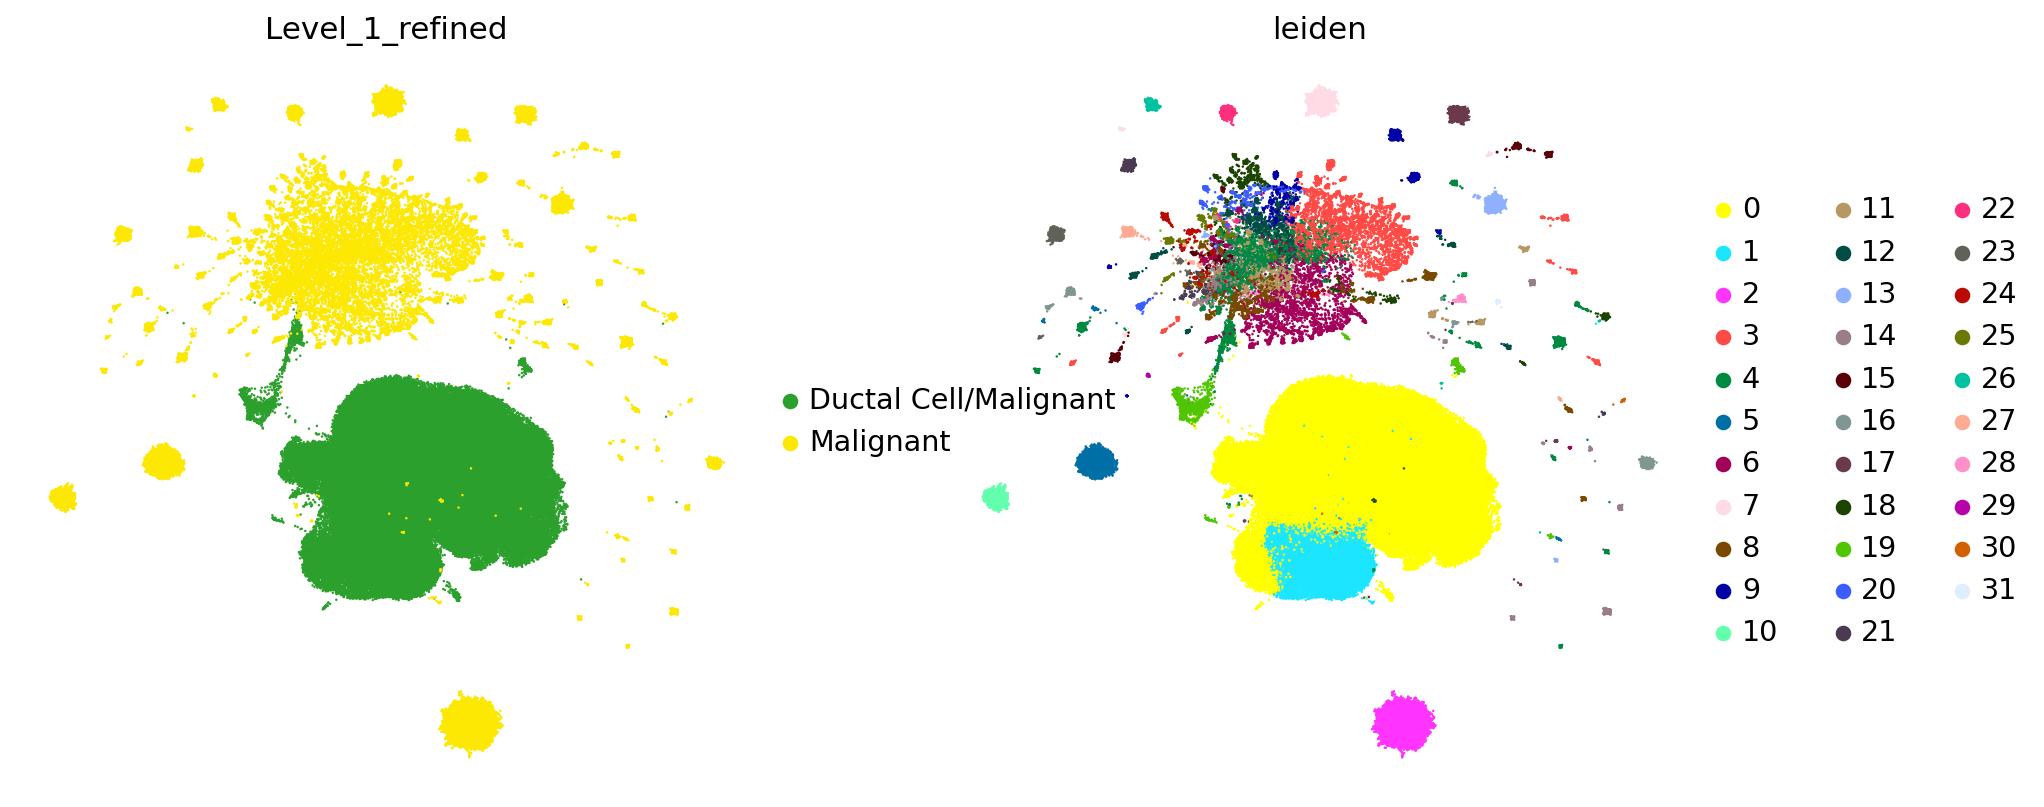

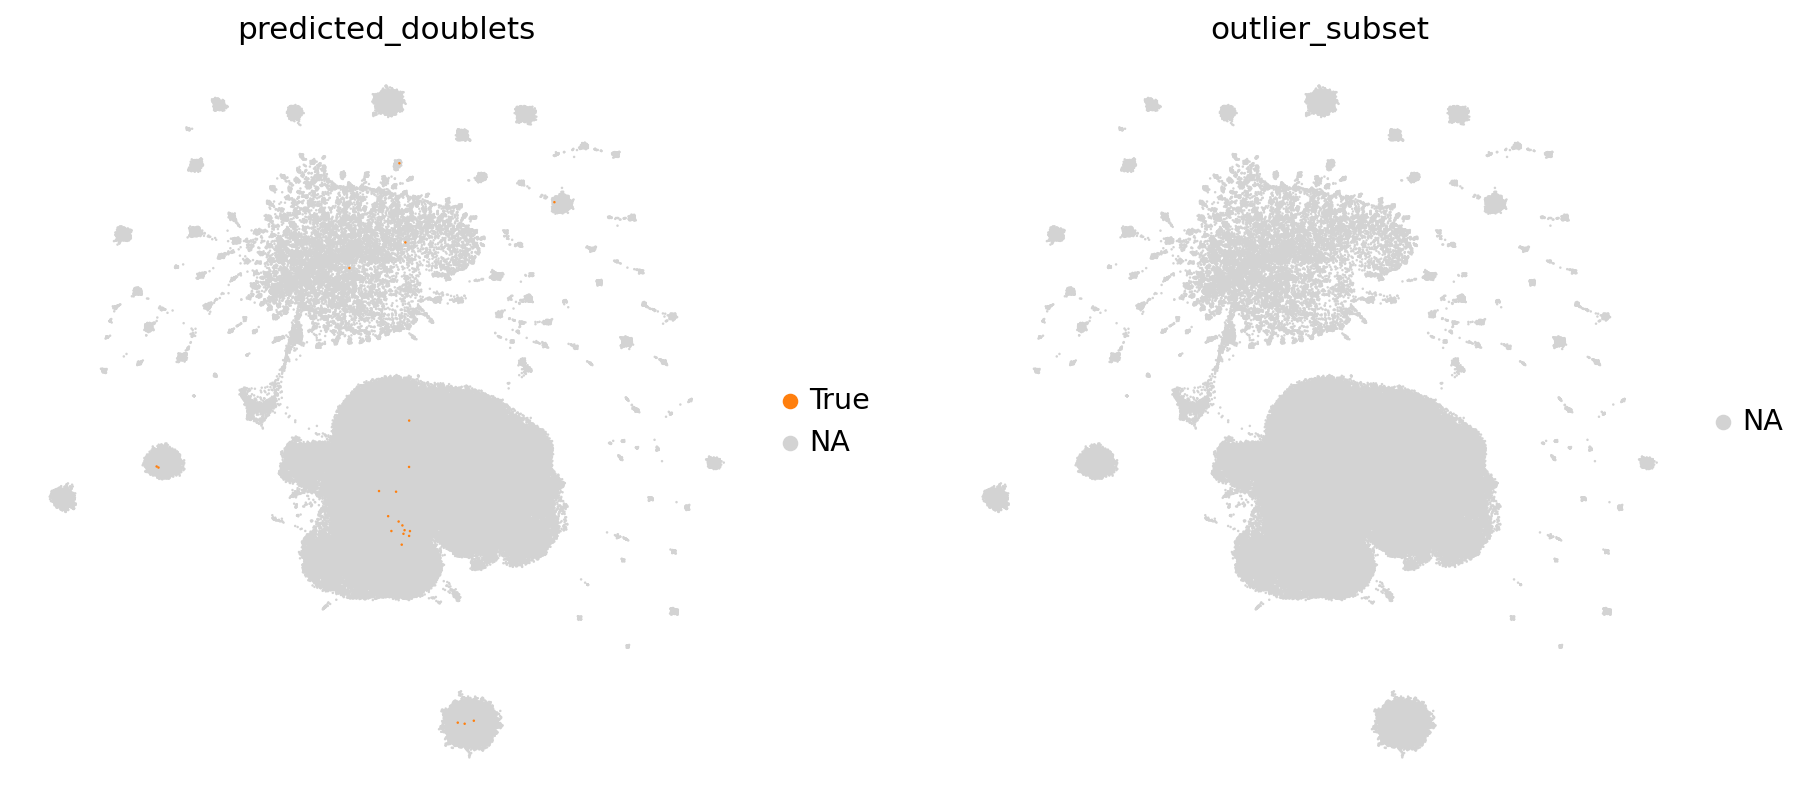

In [149]:
sc.pl.umap(mal_subset, color=['Level_1_refined', 'leiden'], size=5, ncols=2)
sc.pl.umap(mal_subset, color=['predicted_doublets', 'outlier_subset'], groups='True', size=5, ncols=2)

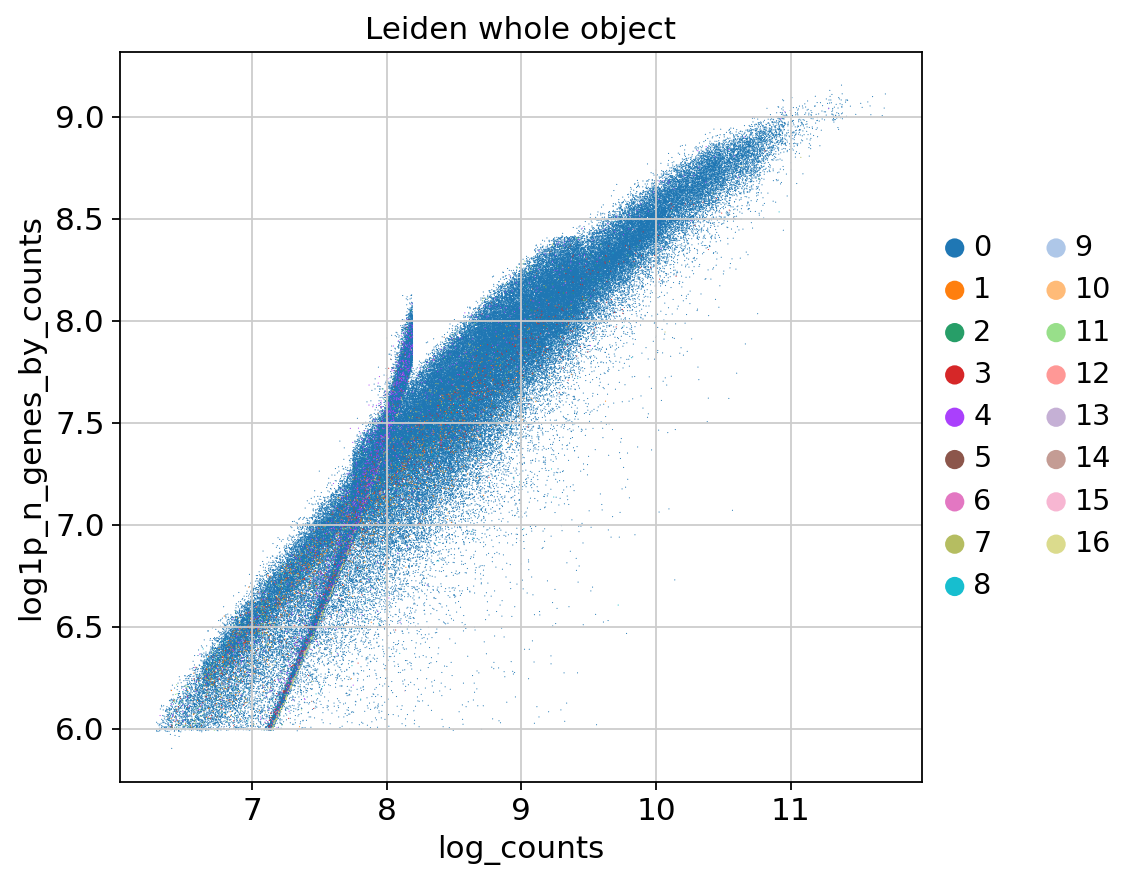

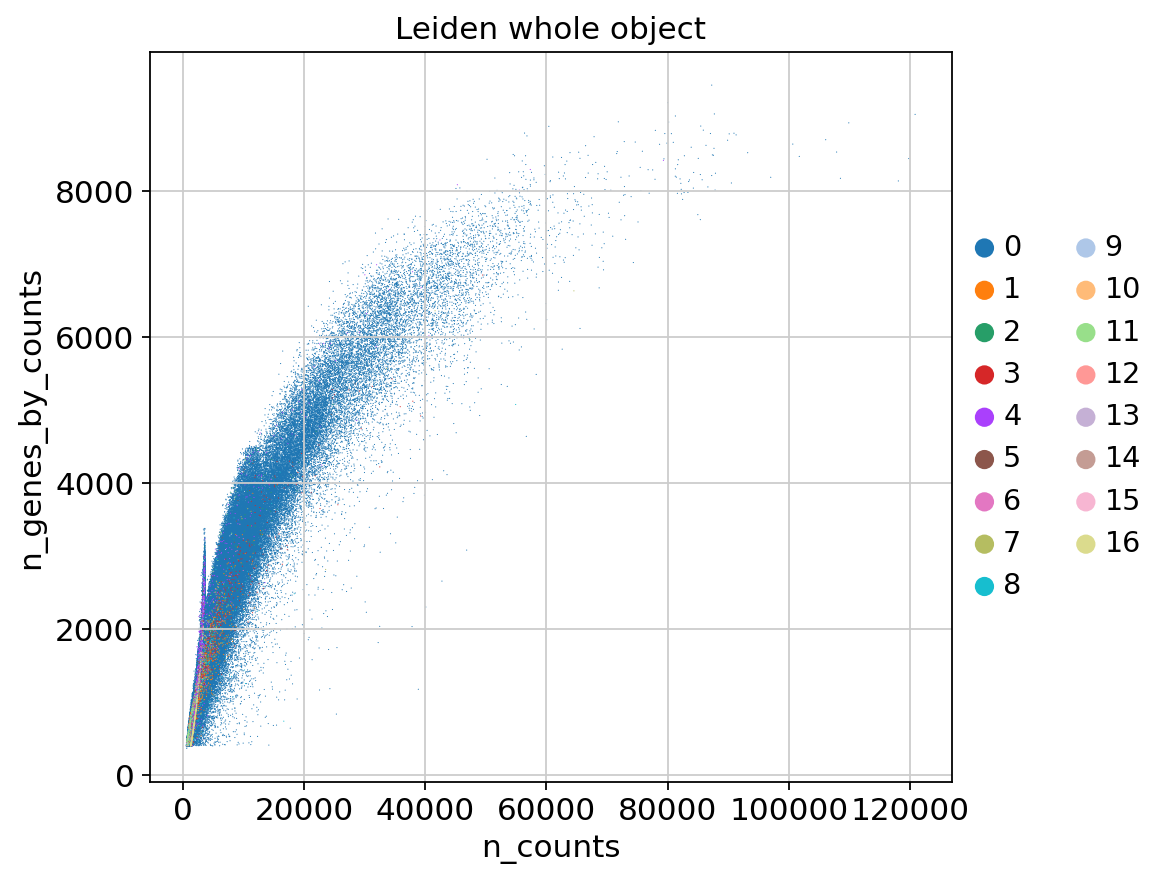

In [113]:
plt.rcParams['figure.figsize'] = (6,6)
sc.pl.scatter(mal, "log_counts", "log1p_n_genes_by_counts", color="Leiden_whole_object", size=1, )
sc.pl.scatter(mal, "n_counts", "n_genes_by_counts", color="Leiden_whole_object", size=1, )

In [75]:
qc_metrics = epi.obs.groupby('leiden')[['n_counts', 'n_genes', 'mt_frac']].mean()